Download a dataset. MovieLens [2] is a popular choice, with a small version of
the latest dataset (09/2018) comprising 100,836 ratings, 9,742 movies, and 610 users.

In [10]:
!pip install -q node2vec==0.4.6
!pip install -qI gensim==4.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 require

In [7]:
import networkx as nx

In [1]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [2]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
# Only consider ratings with the highest score
ratings = ratings[ratings.rating >= 4]
ratings

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459
...,...,...,...,...
99988,421,498,4,892241344
99989,495,1091,4,888637503
99990,806,421,4,882388897
99991,676,538,4,892685437


In [5]:
from collections import defaultdict

pairs = defaultdict(int)

# Loop through the entire list of users
for group in ratings.groupby("user_id"):
    # List of IDs of movies rated by the current user
    user_movies = list(group[1]["movie_id"])

    # Count every time two movies are seen together
    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])] += 1

In [12]:
pairs

defaultdict(int,
            {(61, 33): 4,
             (61, 160): 6,
             (61, 20): 4,
             (61, 202): 4,
             (61, 171): 6,
             (61, 265): 8,
             (61, 47): 5,
             (61, 222): 2,
             (61, 253): 1,
             (61, 113): 3,
             (61, 227): 3,
             (61, 90): 2,
             (61, 64): 10,
             (61, 228): 8,
             (61, 121): 4,
             (61, 114): 2,
             (61, 132): 9,
             (61, 134): 10,
             (61, 98): 13,
             (61, 186): 9,
             (61, 221): 5,
             (61, 84): 1,
             (61, 60): 18,
             (61, 177): 7,
             (61, 174): 12,
             (61, 82): 5,
             (61, 56): 12,
             (61, 80): 1,
             (61, 229): 2,
             (61, 235): 2,
             (61, 6): 2,
             (61, 206): 2,
             (61, 76): 1,
             (61, 72): 2,
             (61, 185): 11,
             (61, 96): 8,
             (61, 25

In [25]:
# Create a networkx graph
G = nx.Graph()

# Try to create an edge between movies that are liked together
for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 20:
        G.add_edge(movie1, movie2, weight=score)
        print(f"Edge added: ({movie1}, {movie2}) with weight {score}")

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Streaming output truncated to the last 5000 lines.
Edge added: (83, 735) with weight 22
Edge added: (385, 282) with weight 22
Edge added: (54, 64) with weight 24
Edge added: (54, 181) with weight 21
Edge added: (58, 237) with weight 28
Edge added: (58, 203) with weight 26
Edge added: (58, 151) with weight 21
Edge added: (58, 181) with weight 36
Edge added: (125, 202) with weight 33
Edge added: (125, 471) with weight 21
Edge added: (125, 237) with weight 32
Edge added: (125, 64) with weight 30
Edge added: (125, 294) with weight 24
Edge added: (125, 151) with weight 28
Edge added: (125, 71) with weight 27
Edge added: (125, 174) with weight 37
Edge added: (161, 64) with weight 36
Edge added: (161, 318) with weight 36
Edge added: (161, 735) with weight 21
Edge added: (202, 237) with weight 35
Edge added: (202, 402) with weight 21
Edge added: (202, 419) with weight 31
Edge added: (202, 294) with weight 27
Edge added: (202, 318) with weight 46
Edge added: (202, 71) with weight 32
Edge added:

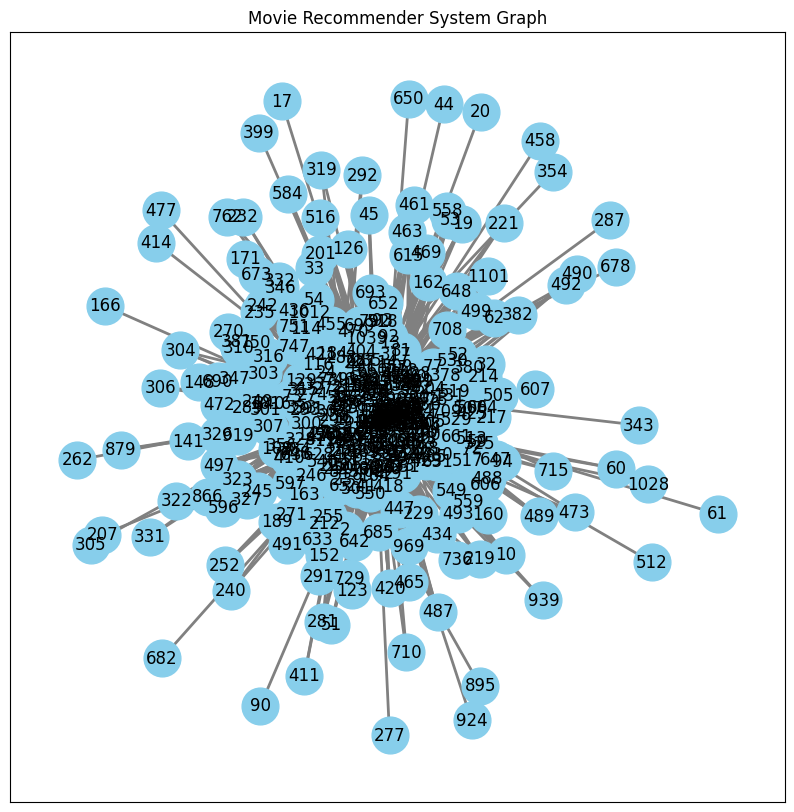

In [26]:
import matplotlib.pyplot as plt
# Vẽ đồ thị
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Tạo layout cho các node

# Vẽ các node
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Vẽ các cạnh
edges = nx.draw_networkx_edges(
    G, pos, edgelist=G.edges(), width=2, edge_color='gray')

# Vẽ nhãn cho các node (ID phim)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Hiển thị đồ thị
plt.title("Movie Recommender System Graph")
plt.show()

In [27]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/410 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


In [28]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

recommend('Star Wars (1977)')

Return of the Jedi (1983): 0.57
Raiders of the Lost Ark (1981): 0.55
Toy Story (1995): 0.50
Amadeus (1984): 0.48
Monty Python and the Holy Grail (1974): 0.48
